## Reference 
https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.4-visualizing-what-convnets-learn.ipynb

(1, 150, 150, 3)


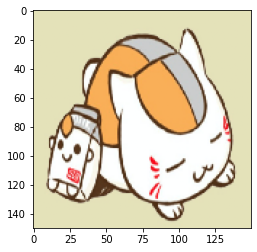

In [3]:
# Import a sample image
#from keras.models import load_model
from keras.preprocessing import image
import numpy as np
img_path = 'nyanko_sensei.jpg'
img = image.load_img(img_path,target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor  /= 255.

print(img_tensor.shape)

import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

# 5.4.3 CAM(Class Activation Map)

In [4]:
# List 5-40
# Import imagenet

from keras import backend as K
from keras.applications.vgg16 import VGG16
K.clear_session()
model = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 6s 0us/step


In [5]:
# List 5-41

from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_path = 'nyanko_sensei.jpg'
img = image.load_img(img_path, target_size=(224,224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [6]:
preds = model.predict(x)
print('Predicted:',decode_predictions(preds,top=3)[0])


40960/35363 [==================================] - 0s 0us/step
Predicted: [('n04579432', 'whistle', 0.13280694), ('n02834397', 'bib', 0.06744962), ('n02892767', 'brassiere', 0.05114576)]


In [7]:
# Max entry
np.argmax(preds[0])

902

## imagenet classs_idx to labels
https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

cf 902 = whistle

In [8]:
# List 5-42

african_elephant_output = model.output[:,386]
last_conv_layer = model.get_layer('block5_conv3')

#grads = K.gradients(african_elephant_output,last_conv_layer.output)[0]
import tensorflow as tf
g = tf.Graph()
with g.as_default():
    grads = tf.gradients(african_elephant_output,last_conv_layer.output)[0]


pooled_grads = K.mean(grads, axis =(0,1,2))

iterate = K.function([model.input],
                    [pooled_grads,last_conv_layer.output[0]])

pooled_grads_value,conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:,:,i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value,axis=-1)


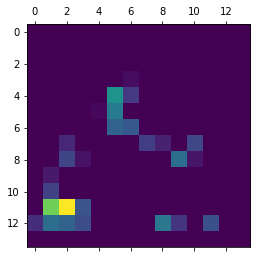

In [9]:
# List 5-43
%matplotlib inline
heatmap = np.maximum(heatmap,0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

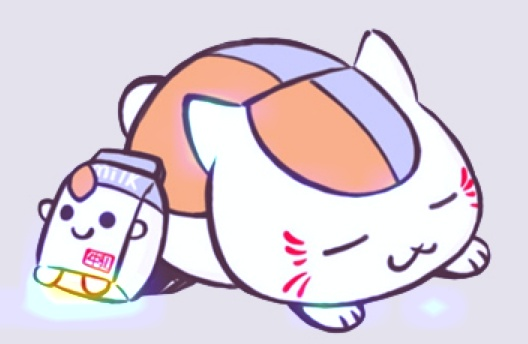

In [10]:
# List 5-44
import cv2

img = cv2.imread(img_path)

heatmap = cv2.resize(heatmap, (img.shape[1],img.shape[0]))

heatmap = np.uint8(255 * heatmap)

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = heatmap * 0.4 + img

cv2.imwrite('heatmaped.jpg',superimposed_img)

from IPython.display import Image
Image('heatmaped.jpg')